<h1 style="color:#2E86C1; font-weight:100; font-size:3em">Basic RNA-seq Data Analyzing using Limma-voom </h1>

**Author:** Faraz Doagooye Tehrani  
**Student Number:** 402105998

---

# PART ONE

---

In [43]:
data <- read.delim(
  "GSE270045_LC_counts.tsv",
  header = TRUE,
  row.names = 1,
  stringsAsFactors = FALSE,
  check.names = FALSE
)

In [44]:
dim(data)

[1] 28889    36

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em;"> Conclusion:</h1>28889 genes and 36 test subjects are seen

In [45]:
head(data)

,CCI031,CCI041,CCI042,CCI050,CCI064,CCI069,CCI077,CCI088,CCI12,CCI136,⋯,S029_11,S030_11,S032_11,S033_11,S034_11,S035_11,S038_11,S039_11,S041_11,S042_11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5S_rRNA,0.000000,0.00000,0.000000,0.00000,0.00000,1.01160,0.00000,0.00000,0.00000,1.156240,⋯,1.00000,0.116938,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000,0.000000,0.00000
A1BG,92.103500,105.87411,85.063750,110.46840,52.29464,107.87480,81.35370,68.41619,73.91880,61.206500,⋯,53.11810,20.861190,13.882260,75.33469,19.839230,18.81397,21.290710,33.086300,46.907500,287.00060
A1CF,9.103139,25.11204,8.072486,12.13559,10.09736,11.13881,15.07144,14.04757,7.05954,9.362694,⋯,9.01949,3.034850,8.000004,11.21168,4.032064,8.10572,2.017351,5.045154,3.009101,31.21248
A2M,60.021740,125.18732,129.918560,145.73940,98.72202,77.07743,243.68887,111.15161,75.47351,140.951040,⋯,147.91510,40.175940,40.333653,115.75506,40.829450,27.38920,78.576590,54.779070,41.090340,559.49865
A2ML1,13.652440,39.72340,21.217640,33.96565,7.28073,24.36490,31.46273,20.06976,18.82923,23.488970,⋯,17.05550,7.693640,12.313010,17.95826,6.925610,8.47630,7.446880,10.821040,14.125550,78.33684
A2MP1,28.999990,61.99998,45.000040,67.00004,21.41833,23.68593,89.75360,35.00000,45.00000,60.999950,⋯,53.88367,11.000000,18.000050,60.00000,12.050800,14.99997,20.000030,15.999960,16.000000,199.62660


In [46]:
mean(as.numeric(data["5S_rRNA", ]))

[1] 0.177662

In most RNA-seq experiments, either poly(A) selection or rRNA depletion is performed to remove ribosomal RNAs before sequencing. 5S_rRNA is a ribosomal RNA and does not contain a poly(A) tail, it is largely removed during these steps.

**Highly read genes** are those that are expressed more and the opposite goes for **lowly read genes**.
However, rRNAs are removed during library prepration and therefore those like the above are hardly found.

In [47]:
print(any(is.na(data)))
print(any(data < 0))
print(range(data))

[1] FALSE
[1] FALSE
[1]     0.00 95726.72


<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> There are no NAs and no negative inputs in the table and the range is between 0.0 and 95726.72

<h1 style="color:#AED6F1; font-weight:100; font-size:1.8em"> Analysis:</h1> 
Based on the fact that the numbers are not integers and that there are no negatives we can conclude that the data set is not the raw data.

Also, due to the fact that the range of the numbers is very huge, the numbers are noramlized and not log-transformed.

Due to the way limma-voom works, it needs to have raw count or count like data and using log-transformed data will ruin it.

In [54]:
library_size <- colSums(data)
library_size

CCI031    CCI041    CCI042    CCI050    CCI064    CCI069    CCI077    CCI088 
2383583.6 4251029.4 2300501.5 4131167.0 2721693.4 3424618.6 3393794.0 2819476.7 
    CCI12    CCI136    CCI138     CCI58     CCI93    HP1193    HP1194    HP1301 
2427171.8 2229907.4 2991846.3 3249697.9 2870250.8 3477953.6 3642627.1 3790639.8 
    HP851   S013_11   S014_11   S016_11   S020_11   S023_11   S024_11   S025_11 
4912093.9 7181587.0 4417882.3 7129418.6 3986680.8 3693544.7 7234882.6 2596175.2 
  S026_11   S027_11   S029_11   S030_11   S032_11   S033_11   S034_11   S035_11 
4645008.5 4918891.8 2158896.2  914928.3  896464.4 2015850.5  647288.5  681044.9 
  S038_11   S039_11   S041_11   S042_11 
1417882.1 1430586.6 1960506.6 8678469.0

In [66]:
cat("min:", names(which.min(library_size)), ":", min(library_size), "\n")
cat("max:", names(which.max(library_size)), ":", max(library_size))
summary(library_size)


min: S034_11 : 647288.5 
max: S042_11 : 8678469

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 647289 2212155 3120772 3378446 4161133 8678469 

In [ ]:
max(library_size) / min(library_size)

[1] 13.40742

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> Huge difference can be infered. The min of subjects and the max can also be seen above.

This causes bias and FN and FP results.

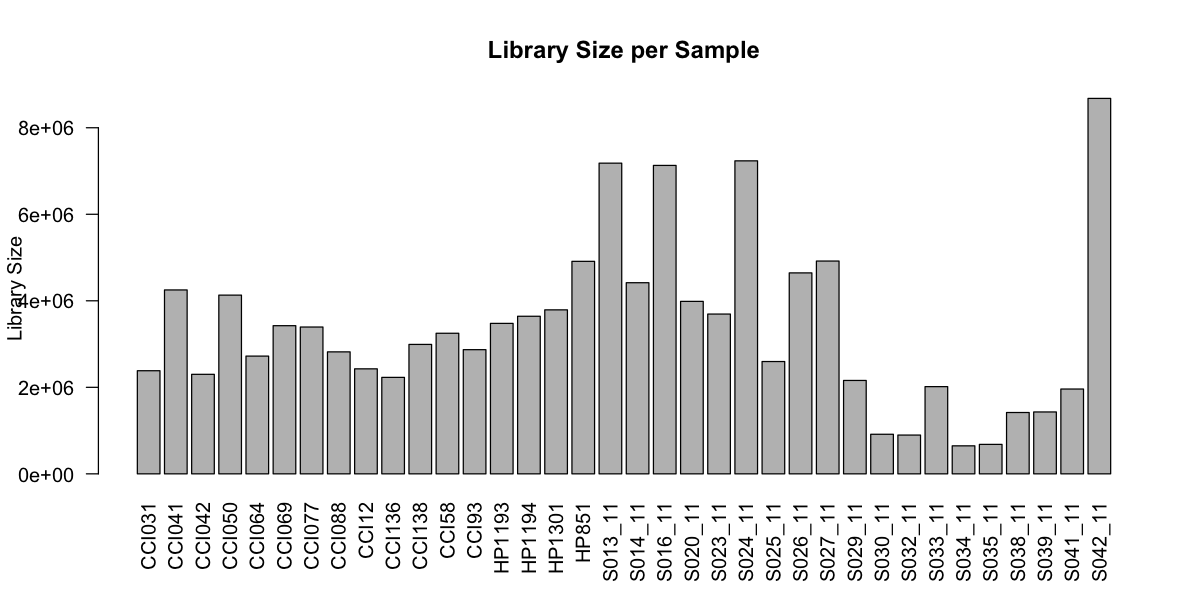

In [68]:
barplot(
  library_size,
  las = 2,
  ylab = "Library Size",
  main = "Library Size per Sample"
)


In [69]:
all_zero_genes <- rowSums(counts) == 0
sum(all_zero_genes)


[1] 4642

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> As shown above, 4642 genes have zero existance accross all subjects.

Also as shown in the plot, S042_11 has a very huge number of expressed genes in comparison to some of the really small ones like S034_11

# Part Two

---

In [81]:
library(GEOquery)
gse <- getGEO("GSE270045", GSEMatrix = TRUE)
pdata <- pData(gse[[1]])

Found 1 file(s)

GSE270045_series_matrix.txt.gz

Using locally cached version: /var/folders/ln/0t9fc__n27lf_tzsnl8rx0840000gn/T//RtmpHAsOSC/GSE270045_series_matrix.txt.gz

Using locally cached version of GPL34284 found here:
/var/folders/ln/0t9fc__n27lf_tzsnl8rx0840000gn/T//RtmpHAsOSC/GPL34284.soft.gz 



In [82]:
pdata

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,library_selection,library_source,library_strategy,relation,relation.1,supplementary_file_1,cell type:ch1,sample id:ch1,tissue:ch1,treatment:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM8333270,Healthy Control 1,GSM8333270,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949172,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876995,NONE,whole blood,CCI031,whole blood,No
GSM8333271,Healthy Control 2,GSM8333271,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949173,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876994,NONE,whole blood,CCI041,whole blood,No
GSM8333272,Healthy Control 3,GSM8333272,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949174,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876993,NONE,whole blood,CCI042,whole blood,No
GSM8333273,Healthy Control 4,GSM8333273,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949175,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876992,NONE,whole blood,CCI050,whole blood,No
GSM8333274,Healthy Control 5,GSM8333274,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949176,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876991,NONE,whole blood,CCI064,whole blood,No
GSM8333275,Healthy Control 6,GSM8333275,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949177,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876990,NONE,whole blood,CCI069,whole blood,No
GSM8333276,Healthy Control 7,GSM8333276,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949178,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876989,NONE,whole blood,CCI077,whole blood,No
GSM8333277,Healthy Control 8,GSM8333277,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949179,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876988,NONE,whole blood,CCI088,whole blood,No
GSM8333278,Healthy Control 9,GSM8333278,Public on Oct 15 2024,Jun 17 2024,Oct 15 2024,SRA,1,whole blood,Homo sapiens,tissue: whole blood,⋯,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX24949180,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN41876987,NONE,whole blood,CCI12,whole blood,No


In [83]:
group <- ifelse(grepl("Healthy Control", pdata$title), "Control", "ME_CFS")
pdata$group <- group
table(pdata$group)
write.csv(pdata, "GSE270045_metadata_with_group.csv", row.names = TRUE)


Control  ME_CFS 
     17      19 

In [84]:
sample_id <- sub("sample id: ", "", pdata$characteristics_ch1.3)
pdata$sample_id <- sample_id

In [85]:
all(pdata$sample_id %in% colnames(data))

[1] TRUE

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
All the samples exist in the data we had before.

In [86]:
data <- data[, pdata$sample_id]
all(colnames(data) == pdata$sample_id) 

[1] TRUE

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
Now the data is alligned with the sample_id. 

In [87]:
dataframe <- data.frame(
  sample_id = sample_id,
  group = group,
  row.names = sample_id,
  stringsAsFactors = FALSE
)

In [88]:
dataframe

,sample_id,group
,<chr>,<chr>
CCI031,CCI031,Control
CCI041,CCI041,Control
CCI042,CCI042,Control
CCI050,CCI050,Control
CCI064,CCI064,Control
CCI069,CCI069,Control
CCI077,CCI077,Control
CCI088,CCI088,Control
CCI12,CCI12,Control


# Part Three
---

In [ ]:
print(any(is.na(data)))
print(any(data < 0))
print(range(data))
all_values <- unlist(data)
#overall summary
summary(all_values)
#summary by every sample
summary(data)

[1] FALSE
[1] FALSE
[1]     0.00 95726.72


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     0.00     4.62   116.95    60.61 95726.72 

     CCI031             CCI041              CCI042             CCI050        
 Min.   :    0.00   Min.   :    0.000   Min.   :    0.00   Min.   :    0.00  
 1st Qu.:    0.00   1st Qu.:    0.000   1st Qu.:    0.00   1st Qu.:    0.00  
 Median :    4.08   Median :    7.176   Median :    4.00   Median :    7.05  
 Mean   :   82.51   Mean   :  147.150   Mean   :   79.63   Mean   :  143.00  
 3rd Qu.:   51.62   3rd Qu.:   90.000   3rd Qu.:   54.54   3rd Qu.:   91.56  
 Max.   :34702.50   Max.   :30295.039   Max.   :15085.00   Max.   :52437.55  
     CCI064             CCI069             CCI077              CCI088         
 Min.   :    0.00   Min.   :    0.00   Min.   :    0.000   Min.   :    0.000  
 1st Qu.:    0.00   1st Qu.:    0.00   1st Qu.:    0.000   1st Qu.:    0.000  
 Median :    4.00   Median :    6.00   Median :    5.211   Median :    4.649  
 Mean   :   94.21   Mean   :  118.54   Mean   :  117.477   Mean   :   97.597  
 3rd Qu.:   48.00   3rd Qu.:   73.76   3rd Qu.:   68.627   

In [107]:
control_lib <- library_size[group == "Control"]
mecfs_lib <- library_size[group == "ME_CFS"]

summary(control_lib)
summary(mecfs_lib)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
2229907 2721693 3249698 3236356 3642627 4912094 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 647289 1424234 2596175 3505578 4781950 8678469 

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
Means are close but the Min and Max values are very far apart in the two groups.

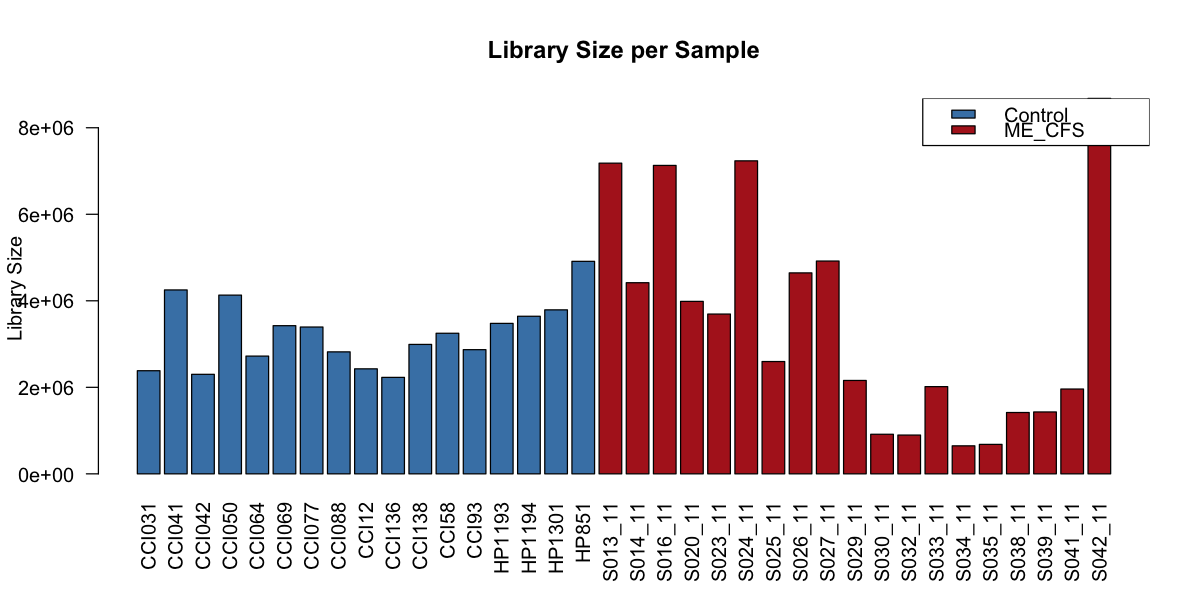

In [98]:
cols <- ifelse(group == "Control", "steelblue", "firebrick")

barplot(
  library_size,
  col = cols,
  las = 2,
  ylab = "Library Size",
  main = "Library Size per Sample"
)

legend(
  "topright",
  legend = c("Control", "ME_CFS"),
  fill = c("steelblue", "firebrick")
)


In [101]:
#expressing in log format
log_expr <- log2(data + 1)


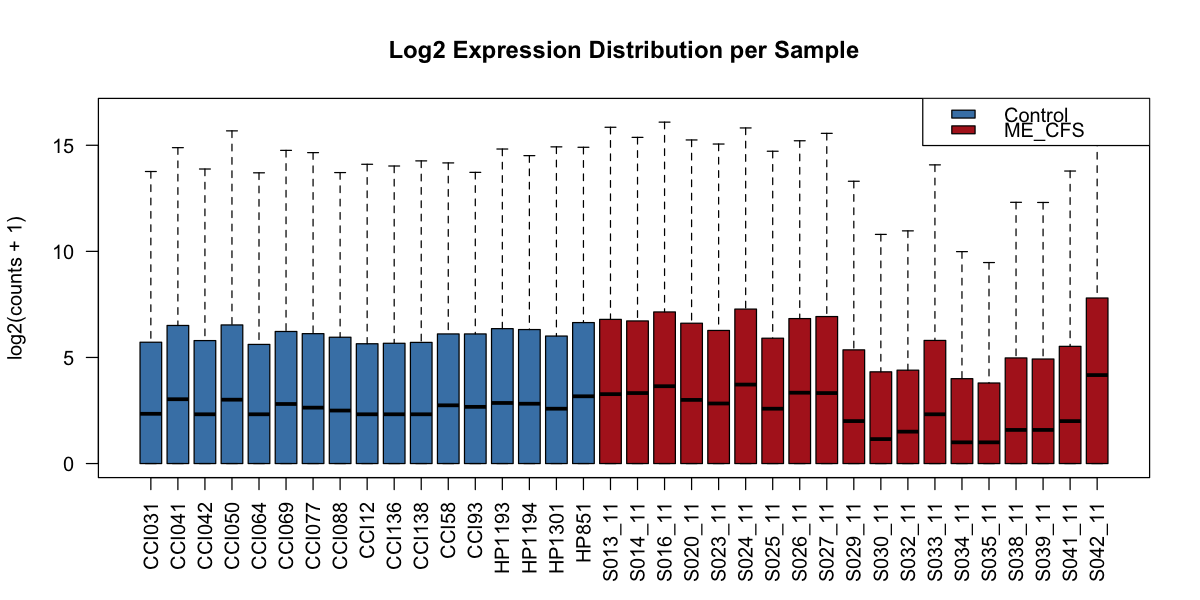

In [102]:
cols <- ifelse(group == "Control", "steelblue", "firebrick")

log_expr <- log2(data + 1)

boxplot(
  log_expr,
  col= cols,
  las = 2,
  main = "Log2 Expression Distribution per Sample",
  ylab = "log2(counts + 1)",
  outline = FALSE
)

legend(
  "topright",
  legend = c("Control", "ME_CFS"),
  fill = c("steelblue", "firebrick")
)


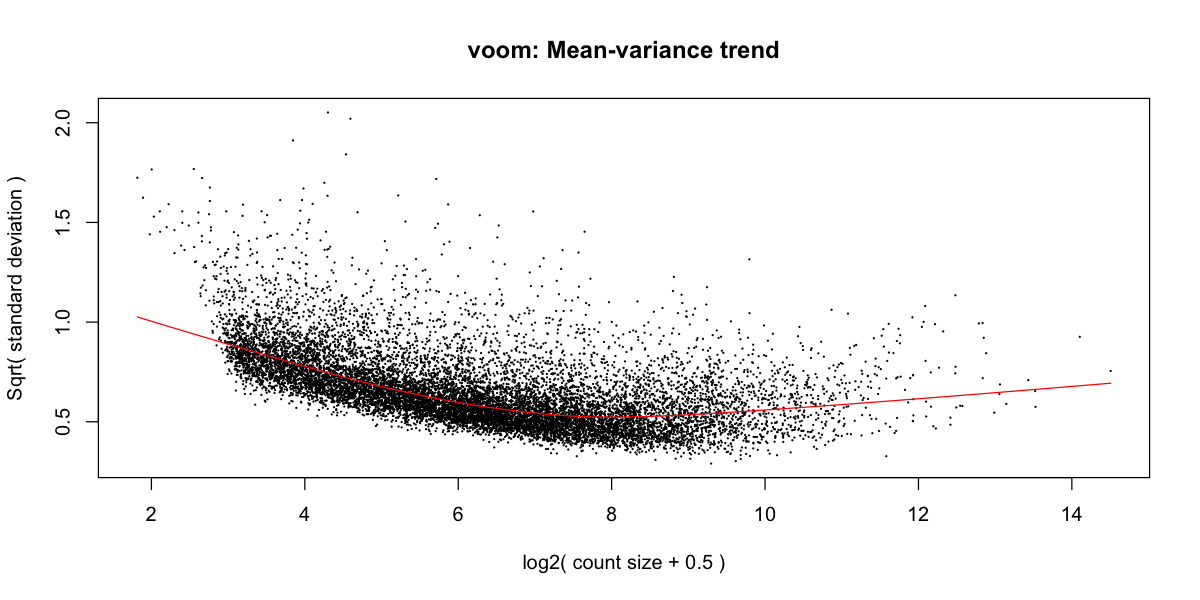

In [ ]:
library(edgeR)
library(limma)

dge <- DGEList(counts = data)

#the part below deletes the genes with low expression (for part Five)
keep <- filterByExpr(dge, group = group)
dge <- dge[keep, , keep.lib.sizes = FALSE]

dge <- calcNormFactors(dge)

design <- model.matrix(~ group)

v <- voom(dge, design, plot = TRUE)


# Part Four
---

In [ ]:
#we delete the bottom 5 percent of the variances to reduce noise
gene_var <- apply(log_expr, 1, var)
percent_to_remove <- 0.05
cutoff <- quantile(gene_var, percent_to_remove)
keep_genes <- gene_var > cutoff
log_expr_filtered <- log_expr[keep_genes, ]

In [109]:
log_expr_t <- t(log_expr_filtered) #transposing

In [110]:
pca_res <- prcomp(log_expr_t, scale.=FALSE)
summary(pca_res)

Importance of components:
                           PC1      PC2     PC3      PC4      PC5      PC6
Standard deviation     114.013 31.37841 27.3215 18.68305 18.40903 17.34926
Proportion of Variance   0.599  0.04537  0.0344  0.01608  0.01562  0.01387
Cumulative Proportion    0.599  0.64438  0.6788  0.69486  0.71048  0.72435
                            PC7      PC8      PC9     PC10    PC11     PC12
Standard deviation     16.94636 16.11764 15.83189 15.68844 15.2370 15.05688
Proportion of Variance  0.01323  0.01197  0.01155  0.01134  0.0107  0.01045
Cumulative Proportion   0.73758  0.74955  0.76110  0.77245  0.7831  0.79359
                          PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     14.9486 14.75197 14.65081 14.61522 14.44903 14.40153
Proportion of Variance  0.0103  0.01003  0.00989  0.00984  0.00962  0.00956
Cumulative Proportion   0.8039  0.81392  0.82381  0.83365  0.84327  0.85283
                           PC19     PC20    PC21     PC22     PC23

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
About 60 percent of the variance comes from PC1 and about 4.5 percent from PC2 and 3.4 percent from PC3.

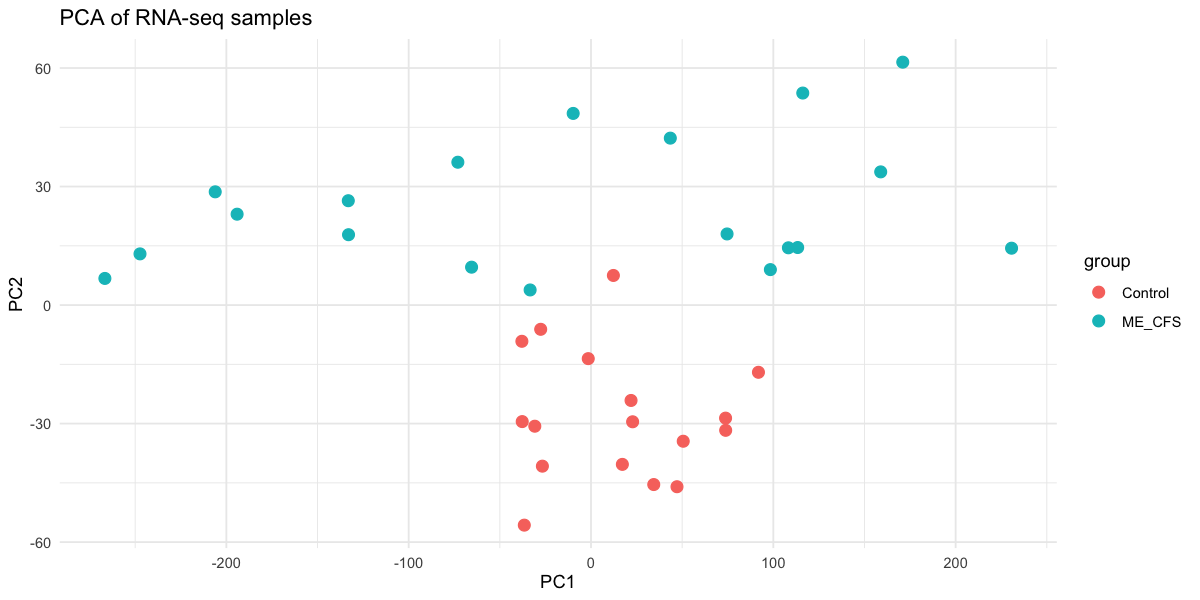

In [111]:
pca_df <- data.frame(
  PC1 = pca_res$x[,1],
  PC2 = pca_res$x[,2],
  group = group
)

library(ggplot2)

ggplot(pca_df, aes(x = PC1, y = PC2, color = group)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(
    title = "PCA of RNA-seq samples",
    x = "PC1",
    y = "PC2"
  )


<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
As it can be seen from the above, they are almost compeletly seperated by a line in the PC1-PC2 space(except for one point in the control class).

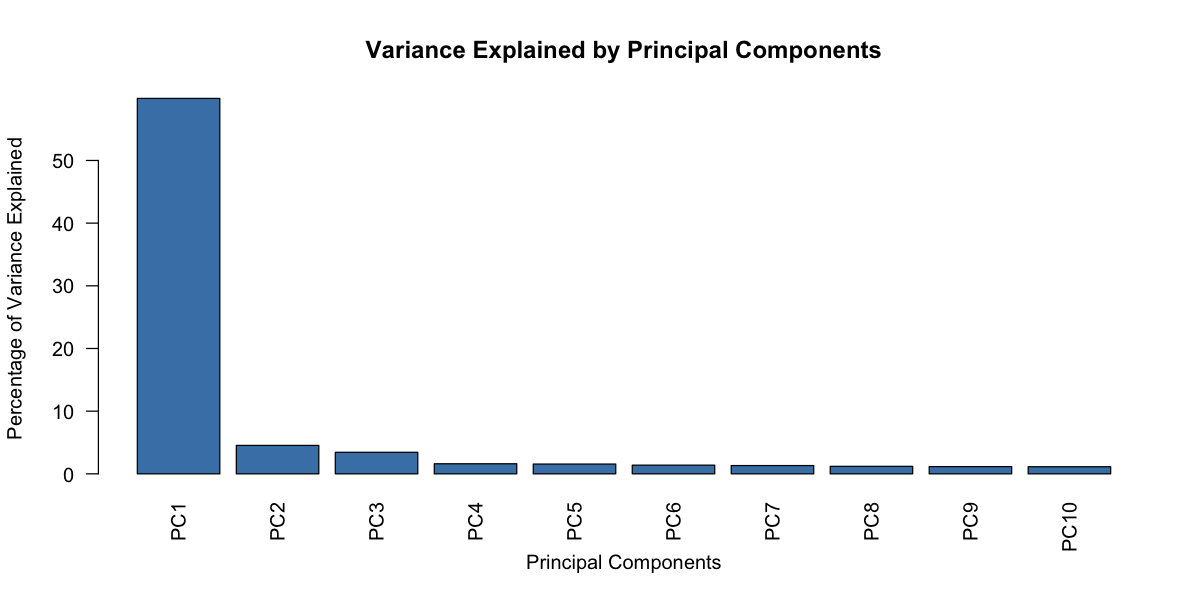

In [112]:
var_explained <- summary(pca_res)$importance[2, ] * 100

# number of PCs in the plot
num_pcs <- 10

barplot(
  var_explained[1:num_pcs],
  names.arg = paste0("PC", 1:num_pcs),
  ylab = "Percentage of Variance Explained",
  xlab = "Principal Components",
  main = "Variance Explained by Principal Components",
  col = "steelblue",
  las = 2
)

# Part Five
---

Continuing with the variables created in part three:

In [113]:
fit <- lmFit(v, design)
fit <- eBayes(fit)

In [128]:
res <- topTable(fit,
                coef = "groupME_CFS",
                number = Inf,
                adjust.method = "BH")

head(res)
print("logFC:")
summary(res$logFC)
print("AveExpr:")
summary(res$AveExpr)
print("P.Value:")
summary(res$P.Value)
print("adj.P.Val:")
summary(res$adj.P.Val)
print("B:")
summary(res$B)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TAF1D,0.9711999,6.205100,13.36408,5.167842e-16,6.822068e-12,26.31083
SCAF1,-0.9807698,6.492777,-12.54382,3.774746e-15,2.057448e-11,24.38515
MAP1S,-0.8988431,6.113294,-12.36824,5.838887e-15,2.057448e-11,23.96020
ZBTB7A,-0.7175256,7.490111,-12.34057,6.256581e-15,2.057448e-11,23.88370
SLC38A10,-0.7942515,7.435770,-12.18036,9.351330e-15,2.057448e-11,23.49449
PLEC,-0.9749175,9.253453,-12.20818,8.718903e-15,2.057448e-11,23.46551


[1] "logFC:"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.77156 -0.31277  0.02003 -0.01038  0.29357  4.84677 

[1] "AveExpr:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3153  3.2132  4.6635  4.7457  6.0660 13.0049 

[1] "P.Value:"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0002839 0.0250251 0.1829549 0.2797951 0.9994570 

[1] "adj.P.Val:"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.001135 0.050046 0.217940 0.373003 0.999457 

[1] "B:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.9180 -5.8804 -4.0333 -2.1309  0.0329 26.3108 

In [ ]:
#top three genes
top_genes <- head(res[order(res$adj.P.Val), ], 3)

top_genes[, c("logFC", "adj.P.Val")ا]

,logFC,adj.P.Val
,<dbl>,<dbl>
TAF1D,0.9711999,6.822068e-12
SCAF1,-0.9807698,2.057448e-11
MAP1S,-0.8988431,2.057448e-11


In [131]:
res$significant <- res$adj.P.Val < 0.05 & abs(res$logFC) > 1
sum(res$significant)

[1] 174

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
174 genes are significant.

In [132]:
sig_genes <- res[res$adj.P.Val < 0.05, ]
upregulated <- sum(sig_genes$logFC > 0)
downregulated <- sum(sig_genes$logFC < 0)

upregulated
downregulated

[1] 3308

[1] 3291

<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
Upregulated and Downregulated genes are almost the same with the upregulated ones being a little more.

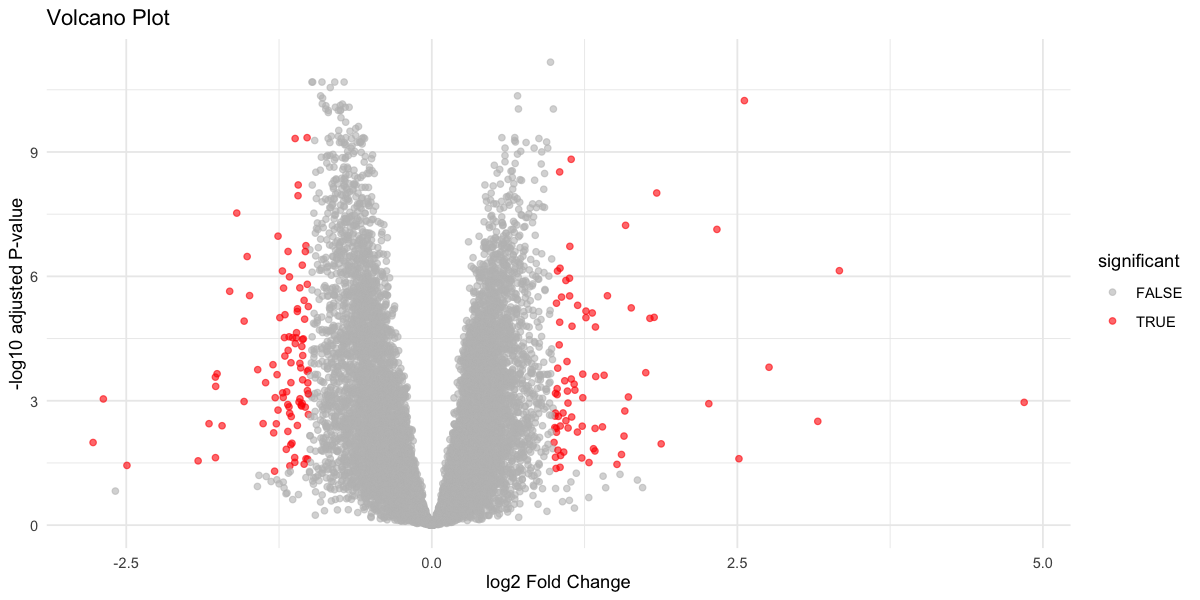

In [ ]:
library(ggplot2)


ggplot(res, aes(x = logFC, y = -log10(adj.P.Val))) +
  geom_point(aes(color = significant), alpha = 0.6) +
  scale_color_manual(values = c("grey", "red")) +
  theme_minimal() +
  labs(title = "Volcano Plot",
       x = "log2 Fold Change",
       y = "-log10 adjusted P-value")


<h1 style="color:#2E86C1; font-weight:100; font-size:1.8em"> Conclusion:</h1> 
We can see the most significant genes(adj.P.Val < 0.05 and |logFC| > 1) marked by the red point above.

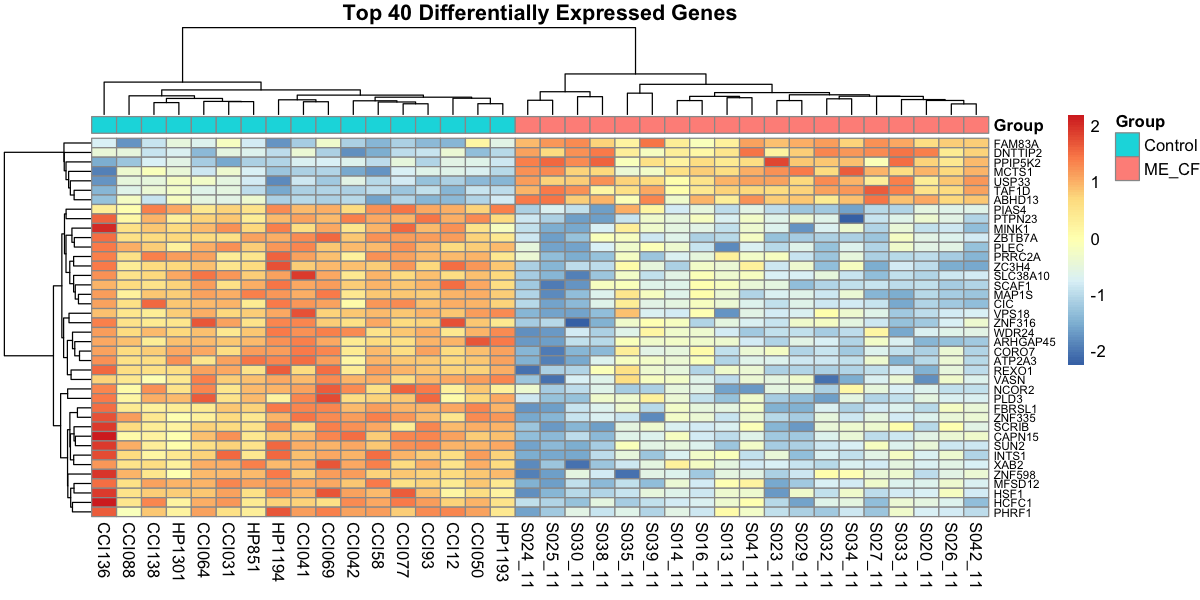

In [124]:
library(pheatmap)

res_sorted <- res[order(res$adj.P.Val), ]
top_genes <- rownames(res_sorted)[1:40]
mat <- v$E[top_genes, ]

mat_scaled <- t(scale(t(mat)))

annotation_col <- data.frame(
  Group = group
)
rownames(annotation_col) <- colnames(mat_scaled)

pheatmap(
  mat_scaled,
  annotation_col = annotation_col,
  show_rownames = TRUE,
  clustering_distance_rows = "euclidean",
  clustering_distance_cols = "euclidean",
  main = "Top 40 Differentially Expressed Genes",
  fontsize_row = 7
)